# Some useful statistics:
* Total hours
* Num utterances
* Histogram of duration
* Phoneme distribution (monophone, triphones?)


In [6]:
import argparse as ap
import collections
import wave
import contextlib
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

{'KH': 4759, 'AS': 7706, 'KCS': 5939, 'X': 7456, 'AJ': 4099, 'NZJ': 3125, 'CH': 7859, 'IR': 829, 'B': 8284, 'AWF': 2076, 'NGZF': 6477, 'K': 17688, 'L': 8694, 'UO': 508, 'NZ': 7617, 'N': 5835, 'OOX': 458, 'UWJ': 1456, 'KCJ': 4862, 'TH': 8800, 'IF': 2923, 'UOS': 803, 'IZS': 4592, 'UF': 843, 'M': 8729, 'OWS': 1940, 'DD': 13692, 'WAJ': 1715, 'EEF': 1315, 'NZF': 3520, 'PCS': 1318, 'TR': 5410, 'O': 3699, 'NGZ': 10253, 'OOS': 2606, 'D': 6458, 'A': 9247, 'OO': 5921, 'NG': 4752, 'IEJ': 2829, 'PCJ': 1357, 'PH': 3321, 'TCS': 5050, 'IER': 920, 'NZR': 1218, 'AX': 1469, 'NH': 6788, 'AAS': 3537, 'UWX': 1636, 'NGZX': 2476, 'AR': 3813, 'IZR': 2420, 'AF': 10367, 'IZF': 5352, 'UOR': 1811, 'U': 1208, 'UR': 699, 'NGZR': 1359, 'H': 7636, 'W': 4963, 'IZ': 6822, 'WAF': 2872, 'AAF': 2221, 'AW': 2925, 'AWJ': 1086, 'T': 10368, 'UZF': 3536, 'NZS': 3642, 'OF': 1179, 'UZS': 1788, 'R': 2641, 'UOJ': 434, 'NGZJ': 2368, 'OR': 725, 'OJ': 1865, 'OS': 4667, 'EE': 1979, 'MZ': 2749, 'G': 1360, 'E': 1749, 'UZ': 3215, 'TCJ': 

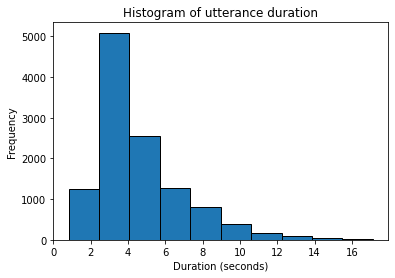

In [16]:
def get_wav_duration(fname):
    with contextlib.closing(wave.open(fname, 'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
    return duration

def plot_duration_hist(duration_list):
    plt.figure()
    plt.title("Histogram of utterance duration")
    plt.xlabel("Duration (seconds)")
    plt.ylabel("Frequency")
    plt.hist(duration_list, edgecolor="black", align='mid')
    plt.show()

def analyze_dataset(data_dir):
    data_dir = Path(data_dir)
    dataset_name = data_dir.name
  
    # Read paths to audio files
    with open(data_dir / 'wav.scp', 'r') as f:
        wav_paths = [line.split(" ")[1].strip() for line in f.readlines()]
   
    # Read the duration of each audio file
    duration_list = []
    for fname in wav_paths: 
        duration = get_wav_duration(str(fname))
        duration_list.append(duration)
            
    # Count phonemes' frequencies 
    lexicon_dict = {}
    with open("data/local/dict_nosp/lexicon.txt", 'r') as f:
        for line in f.readlines():
            word, pronun = line.split(" ", 1)
            phonemes = pronun.strip().split(" ")
            lexicon_dict[word] = phonemes
    phoneme_cnt = {}
    with open(data_dir / "text", 'r') as f:
        for line in f.readlines():
            sentence = line.split(" ", 1)[1].strip()
            for word in sentence.split(" "):
                phonemes = lexicon_dict[word]
                for p in phonemes:
                    phoneme_cnt[p] = phoneme_cnt.get(p, 0) + 1
    print(phoneme_cnt)
        
    print(str(data_dir))
    print(f"\tNumber of utterances: {len(duration_list)}")
    print(f"\tTotal audio hours: {(sum(duration_list) / 3600):.2f}h")
    plot_duration_hist(duration_list)

analyze_dataset("data/vivos_train/")

In [ ]:
for d in ["data/raw/vivos/train/", "data/raw/vivos/test/", "data/raw/vais1000"]:
    print_dataset_size(d)

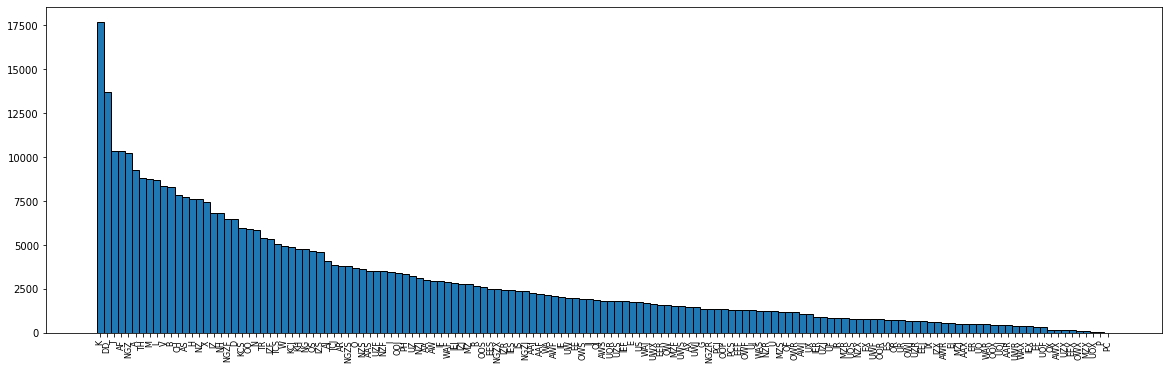

In [51]:
d = {'KH': 4759, 'AS': 7706, 'KCS': 5939, 'X': 7456, 'AJ': 4099, 'NZJ': 3125, 'CH': 7859, 'IR': 829, 'B': 8284, 'AWF': 2076, 'NGZF': 6477, 'K': 17688, 'L': 8694, 'UO': 508, 'NZ': 7617, 'N': 5835, 'OOX': 458, 'UWJ': 1456, 'KCJ': 4862, 'TH': 8800, 'IF': 2923, 'UOS': 803, 'IZS': 4592, 'UF': 843, 'M': 8729, 'OWS': 1940, 'DD': 13692, 'WAJ': 1715, 'EEF': 1315, 'NZF': 3520, 'PCS': 1318, 'TR': 5410, 'O': 3699, 'NGZ': 10253, 'OOS': 2606, 'D': 6458, 'A': 9247, 'OO': 5921, 'NG': 4752, 'IEJ': 2829, 'PCJ': 1357, 'PH': 3321, 'TCS': 5050, 'IER': 920, 'NZR': 1218, 'AX': 1469, 'NH': 6788, 'AAS': 3537, 'UWX': 1636, 'NGZX': 2476, 'AR': 3813, 'IZR': 2420, 'AF': 10367, 'IZF': 5352, 'UOR': 1811, 'U': 1208, 'UR': 699, 'NGZR': 1359, 'H': 7636, 'W': 4963, 'IZ': 6822, 'WAF': 2872, 'AAF': 2221, 'AW': 2925, 'AWJ': 1086, 'T': 10368, 'UZF': 3536, 'NZS': 3642, 'OF': 1179, 'UZS': 1788, 'R': 2641, 'UOJ': 434, 'NGZJ': 2368, 'OR': 725, 'OJ': 1865, 'OS': 4667, 'EE': 1979, 'MZ': 2749, 'G': 1360, 'E': 1749, 'UZ': 3215, 'TCJ': 3864, 'OWR': 1169, 'OWF': 1288, 'EJ': 556, 'IES': 2414, 'EX': 765, 'AAX': 522, 'NZX': 788, 'I': 3432, 'OW': 1582, 'IEF': 1783, 'NGZS': 3809, 'V': 8340, 'IS': 2369, 'OOJ': 3401, 'AWS': 1821, 'EES': 2504, 'IZJ': 2750, 'WAX': 397, 'AA': 2991, 'WA': 2159, 'OOR': 754, 'UX': 1040, 'IZX': 585, 'UZJ': 876, 'MZF': 1540, 'UWR': 408, 'OOF': 1331, 'IE': 2022, 'UZR': 674, 'EER': 1598, 'MZS': 1194, 'EF': 302, 'UW': 1979, 'UJ': 1264, 'OWJ': 675, 'AAJ': 2282, 'US': 1736, 'UWS': 1532, 'ES': 726, 'AWR': 569, 'MZR': 809, 'UWF': 764, 'IX': 589, 'AWX': 172, 'WAS': 1262, 'UZX': 168, 'MZJ': 522, 'WAR': 474, 'IJ': 1914, 'ER': 511, 'OX': 178, 'AAR': 428, 'UOF': 301, 'UOX': 25, 'IEX': 377, 'MZX': 87, 'EEJ': 649, 'EEX': 157, 'OWX': 118, 'P': 11, 'PC': 1}
cnt_list = sorted(d.items(), key=lambda x: x[1])
cnt_list.reverse()
plt.figure(figsize=(20,6))
plt.bar(*zip(*cnt_list), edgecolor='black', width=1)
plt.xticks(rotation=90, fontsize=8)
plt.show()